<a href="https://colab.research.google.com/github/johnboscoimmanuel/PRACTICE/blob/main/NASA_Nearest_Earth_Objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# from google.colab import files
# files.upload()

In [3]:
df=pd.read_csv('/content/neo.csv')
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [4]:
#shape of dataset
df.shape

(90836, 10)

In [5]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [6]:
#Describe the Dataset and show the all column
df.describe(include='all')

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
count,9.083600e+04,90836,90836.000000,90836.000000,90836.000000,9.083600e+04,90836,90836,90836.000000,90836
unique,NaN,27423,NaN,NaN,NaN,NaN,1,1,NaN,2
top,NaN,469219 Kamo`oalewa (2016 HO3),NaN,NaN,NaN,NaN,Earth,False,NaN,False
freq,NaN,43,NaN,NaN,NaN,NaN,90836,90836,NaN,81996
mean,1.438288e+07,NaN,0.127432,0.284947,48066.918918,3.706655e+07,NaN,NaN,23.527103,NaN
std,2.087202e+07,NaN,0.298511,0.667491,25293.296961,2.235204e+07,NaN,NaN,2.894086,NaN
min,2.000433e+06,NaN,0.000609,0.001362,203.346433,6.745533e+03,NaN,NaN,9.230000,NaN
25%,3.448110e+06,NaN,0.019256,0.043057,28619.020645,1.721082e+07,NaN,NaN,21.340000,NaN
50%,3.748362e+06,NaN,0.048368,0.108153,44190.117890,3.784658e+07,NaN,NaN,23.700000,NaN
75%,3.884023e+06,NaN,0.143402,0.320656,62923.604633,5.654900e+07,NaN,NaN,25.700000,NaN


In [7]:
#Dataset information of the all column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [8]:
#Checking NULL VALUES
df.isna().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [9]:
#Drop The column id and name

df.drop(labels=['id','name'],axis=1,inplace=True)

In [10]:
#Checking columns
df.columns

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'orbiting_body', 'sentry_object', 'absolute_magnitude',
       'hazardous'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


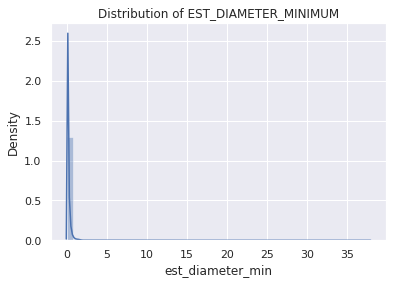

In [11]:
sns.set()
# Distribution plot
sns.distplot(df['est_diameter_min'])
plt.title('Distribution of EST_DIAMETER_MINIMUM')
plt.show()

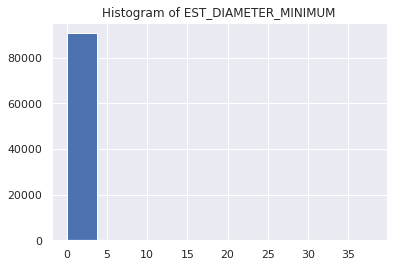

In [12]:
sns.set()
# Histogram plot
plt.hist(df['est_diameter_min'])
plt.title('Histogram of EST_DIAMETER_MINIMUM')
plt.show()

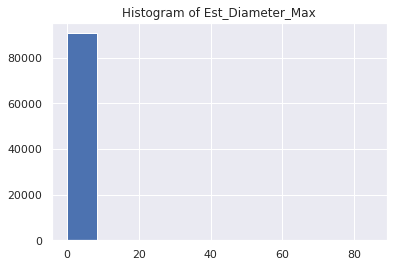

In [13]:
plt.hist(df['est_diameter_max'])
plt.title('Histogram of Est_Diameter_Max')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


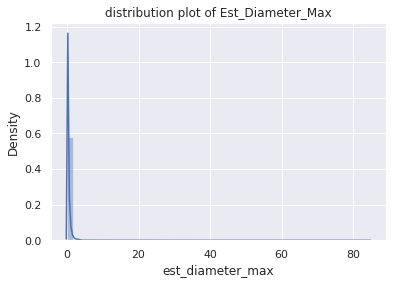

In [14]:
sns.distplot(df['est_diameter_max'])
plt.title('distribution plot of Est_Diameter_Max')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


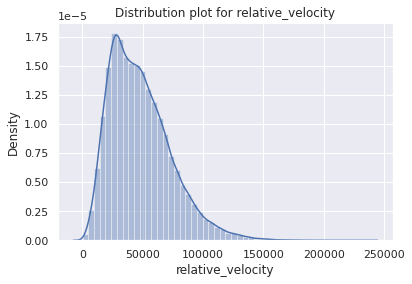

In [15]:

sns.distplot(df['relative_velocity'])
plt.title('Distribution plot for relative_velocity')
plt.show()

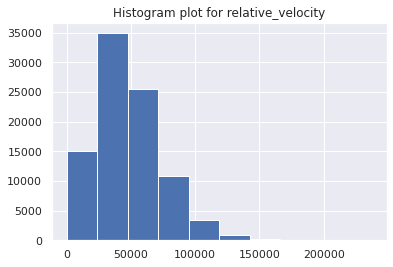

In [16]:
plt.hist(df['relative_velocity'])
plt.title('Histogram plot for relative_velocity')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


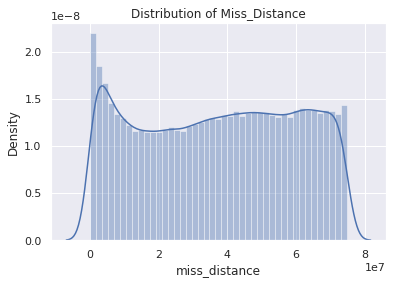

In [17]:
sns.distplot(df['miss_distance'])
plt.title('Distribution of Miss_Distance')
plt.show()

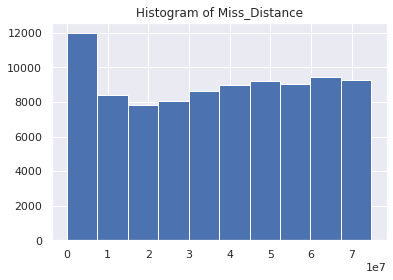

In [18]:
plt.hist(df['miss_distance'])
plt.title('Histogram of Miss_Distance')
plt.show()

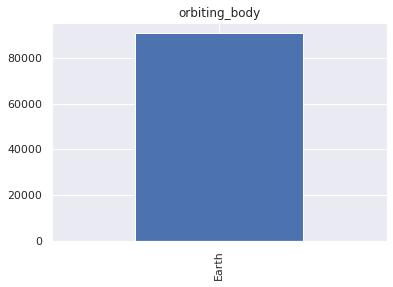

In [19]:
df['orbiting_body'].value_counts().plot(kind='bar',title='orbiting_body')
plt.show()

In [20]:
df['sentry_object'].value_counts()

False    90836
Name: sentry_object, dtype: int64

In [21]:
df.columns

Index(['est_diameter_min', 'est_diameter_max', 'relative_velocity',
       'miss_distance', 'orbiting_body', 'sentry_object', 'absolute_magnitude',
       'hazardous'],
      dtype='object')

In [22]:
df['hazardous'].value_counts()

False    81996
True      8840
Name: hazardous, dtype: int64

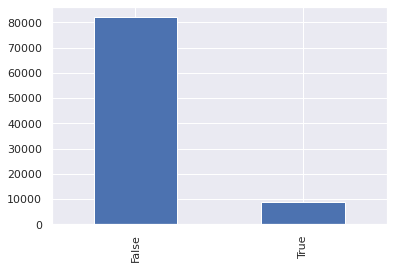

In [23]:
df['hazardous'].value_counts().plot(kind='bar')

In [24]:
df.dtypes

est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

In [25]:
#Select object column
df.select_dtypes(['object','bool']).head()

,orbiting_body,sentry_object,hazardous
0,Earth,False,False
1,Earth,False,True
2,Earth,False,False
3,Earth,False,False
4,Earth,False,True


In [26]:
#label Encoder

from sklearn.preprocessing import LabelEncoder

label=LabelEncoder()
df['hazardous']=label.fit_transform(df['hazardous'])



In [27]:
#Orbiting_body column change Earth to 1
df['orbiting_body']=df['orbiting_body'].replace('Earth',1)

#sentry_object column change Fales to 0
df['sentry_object']=df['sentry_object'].replace('False',0)


In [28]:
df.dtypes

est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body           int64
sentry_object            bool
absolute_magnitude    float64
hazardous               int64
dtype: object

In [29]:
#selected column converting datatypes
df['orbiting_body']=df['orbiting_body'].astype('float64')

df['sentry_object']=df['sentry_object'].astype('float64')

df['hazardous']=df['hazardous'].astype('float')

In [30]:
df.dtypes

est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body         float64
sentry_object         float64
absolute_magnitude    float64
hazardous             float64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


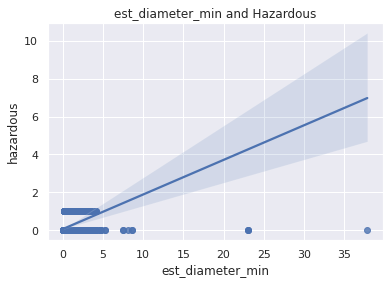

In [31]:
#Relationship  between particular column
sns.regplot(df['est_diameter_min'],df.hazardous,data=df)
plt.title('est_diameter_min and Hazardous')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


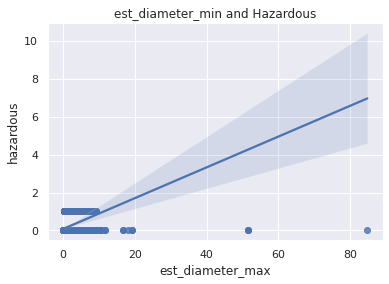

In [32]:
#Relationship  between particular column
sns.regplot(df['est_diameter_max'],df.hazardous,data=df)
plt.title('est_diameter_min and Hazardous')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


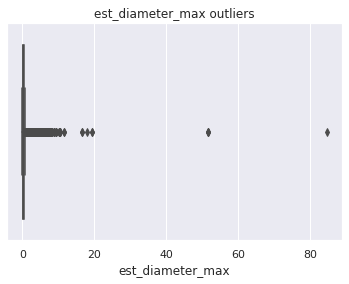

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


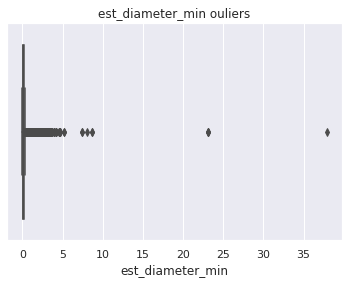

In [33]:
#find the outliers
sns.boxplot(df['est_diameter_max'],data=df)
plt.title('est_diameter_max outliers')
plt.show()

sns.boxplot(df['est_diameter_min'],data=df)
plt.title('est_diameter_min ouliers')
plt.show()



In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   est_diameter_min    90836 non-null  float64
 1   est_diameter_max    90836 non-null  float64
 2   relative_velocity   90836 non-null  float64
 3   miss_distance       90836 non-null  float64
 4   orbiting_body       90836 non-null  float64
 5   sentry_object       90836 non-null  float64
 6   absolute_magnitude  90836 non-null  float64
 7   hazardous           90836 non-null  float64
dtypes: float64(8)
memory usage: 5.5 MB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


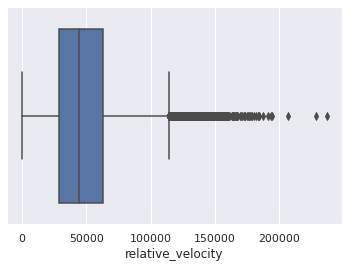

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


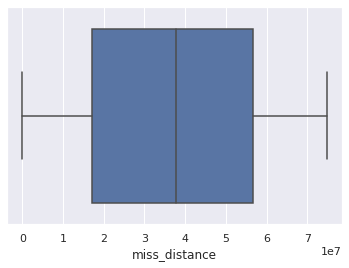

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


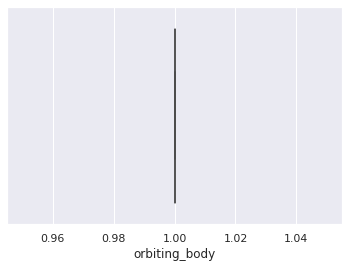

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


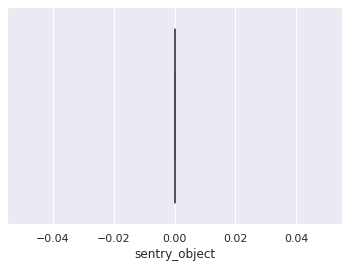

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


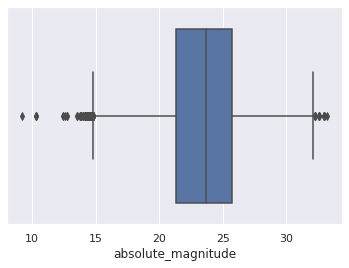

In [43]:
columns=df[['relative_velocity','miss_distance','orbiting_body','sentry_object','absolute_magnitude',]]

for i in columns:
  sns.boxplot(i,data=df,hue=columns[i])
  plt.show()


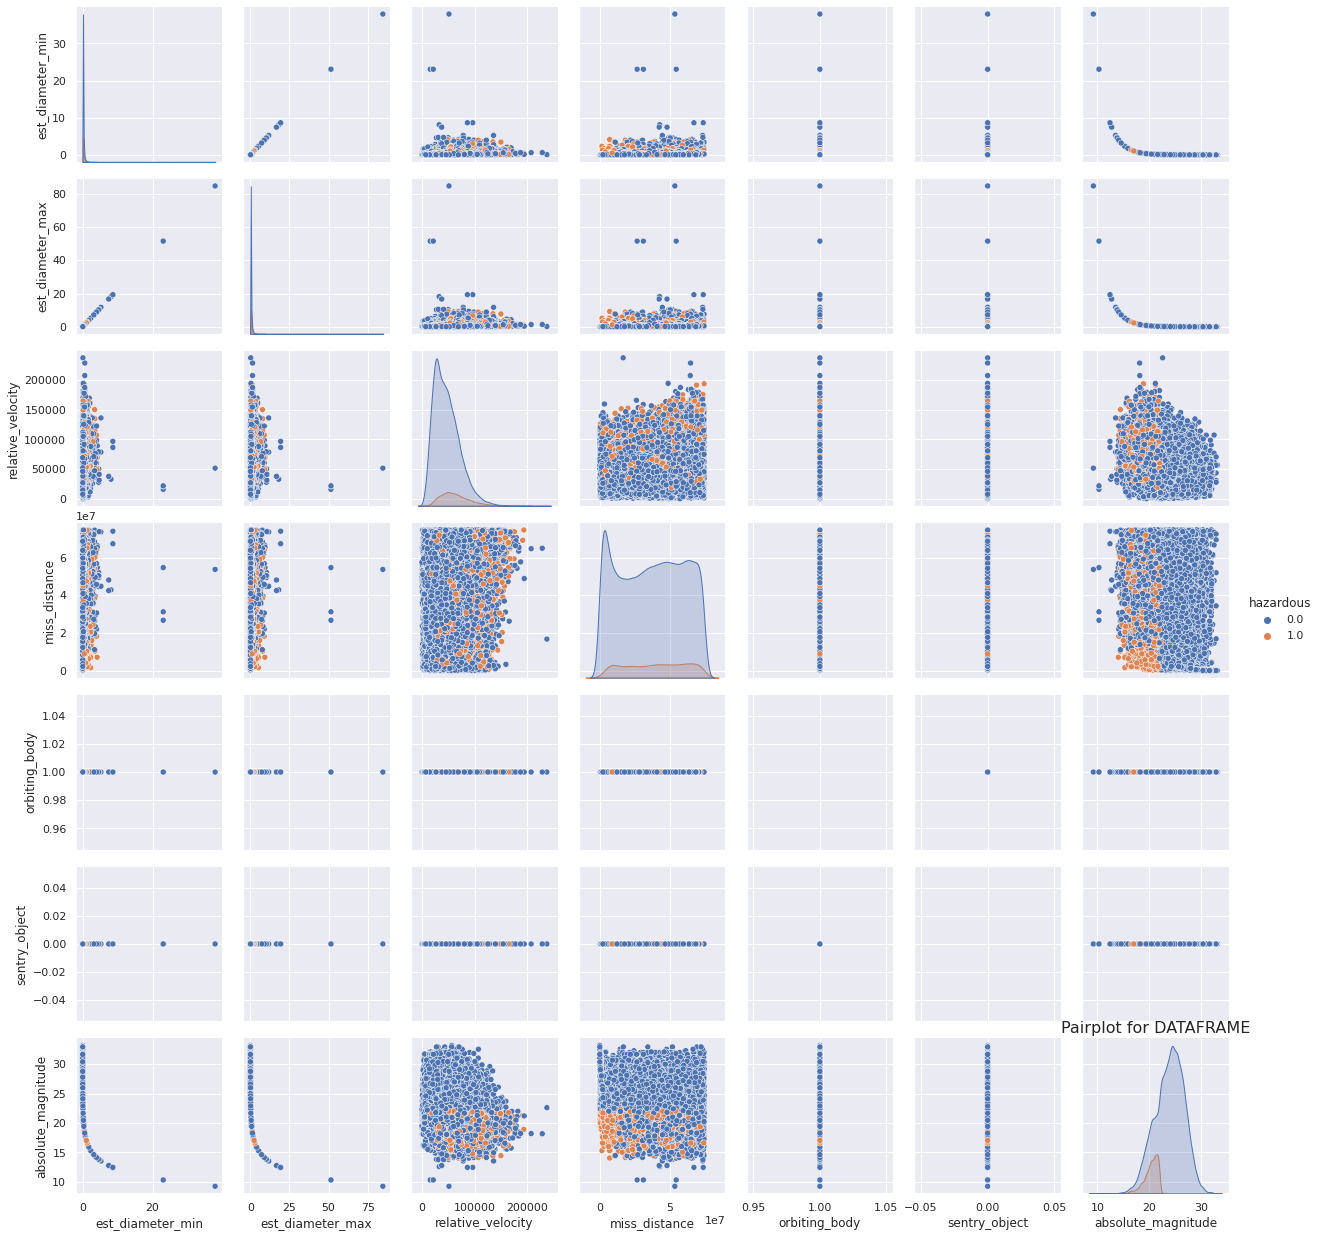

In [76]:
sns.pairplot(data=df,hue='hazardous')
plt.title('Pairplot for DATAFRAME',size=16)
plt.show()

In [36]:
df.dtypes

est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body         float64
sentry_object         float64
absolute_magnitude    float64
hazardous             float64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


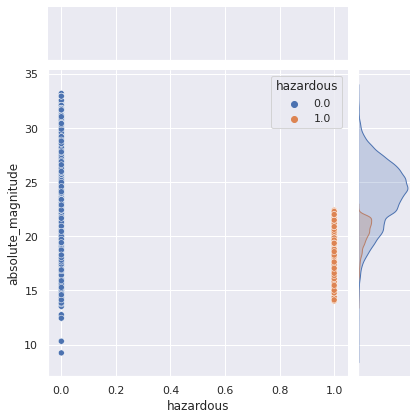

In [41]:
sns.jointplot(df.hazardous,df.absolute_magnitude,data=df,hue='hazardous')
plt.show()

In [56]:
# # Outlier Detected Columns['est_diameter_min', 'est_diameter_max', 'relative_velocity','absolute_magnitude']
# col=df[['est_diameter_min', 'est_diameter_max', 'relative_velocity','absolute_magnitude']]
# col
q1=df.est_diameter_min.quantile(0.25)
q3=df.est_diameter_min.quantile(0.75)
IQR=q3-q1
low_bound=q1-1.5*IQR
up_bound=q3+1.5*IQR

df[(df.est_diameter_min<low_bound) | (df.est_diameter_min>up_bound)]

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
1,0.265800,0.594347,73588.726663,6.143813e+07,1.0,0.0,20.00,1.0
4,0.255009,0.570217,42737.733765,4.627557e+07,1.0,0.0,20.09,1.0
10,0.252671,0.564989,58430.697200,3.833750e+07,1.0,0.0,20.11,1.0
14,0.290105,0.648694,10402.002178,6.078930e+07,1.0,0.0,19.81,0.0
34,0.305179,0.682402,50429.075188,6.849300e+07,1.0,0.0,19.70,0.0
...,...,...,...,...,...,...,...,...
90796,0.257368,0.575493,23538.187187,7.105013e+07,1.0,0.0,20.07,0.0
90798,0.253837,0.567597,74760.342440,7.461988e+07,1.0,0.0,20.10,0.0
90804,0.305179,0.682402,29278.309167,6.541485e+07,1.0,0.0,19.70,0.0
90813,0.265800,0.594347,125252.298778,2.864219e+07,1.0,0.0,20.00,0.0


In [53]:
df=df[(df.est_diameter_min>low_bound) & (df.est_diameter_min<up_bound)]


In [55]:
df.shape

(82530, 8)

In [60]:
q1=df.est_diameter_max.quantile(0.25)
q3=df.est_diameter_max.quantile(0.75)
IQR=q3-q1
low_bound=q1-1.5*IQR
up_bound=q3+1.5*IQR
#find outliers
df[(df.est_diameter_max<low_bound) | (df.est_diameter_max>up_bound)]
#remove Outliers
df=df[(df.est_diameter_max>low_bound) & (df.est_diameter_max<up_bound)]
df.shape



(77908, 8)

In [62]:
q1=df.relative_velocity.quantile(0.25)
q3=df.relative_velocity.quantile(0.75)
IQR=q3-q1
low_bound=q1-1.5*IQR
up_bound=q3+1.5*IQR
#find outliers
df[(df.relative_velocity<low_bound) | (df.relative_velocity>up_bound)]
#remove Outliers
df=df[(df.relative_velocity>low_bound) & (df.relative_velocity<up_bound)]
df.shape


(76768, 8)

In [66]:
q1=df.absolute_magnitude.quantile(0.25)
q3=df.absolute_magnitude.quantile(0.75)
IQR=q3-q1
low_bound=q1-1.5*IQR
up_bound=q3+1.5*IQR
#find outliers
df[(df.absolute_magnitude<low_bound) | (df.absolute_magnitude>up_bound)]
#remove Outliers
df=df[(df.absolute_magnitude>low_bound) & (df.absolute_magnitude<up_bound)]
df.shape


(76667, 8)

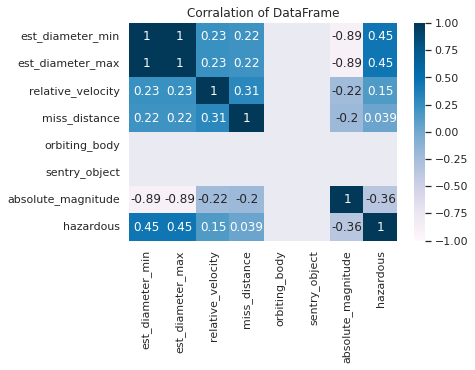

In [67]:
sns.heatmap(df.corr(),annot=True,cmap='PuBu',vmax=-1,vmin=1)
plt.title('Corralation of DataFrame')
plt.show()

In [69]:
#splitting indipentent variable and depentent variable
x=df.loc[:,['est_diameter_min', 'est_diameter_max', 'relative_velocity','miss_distance','orbiting_body','sentry_object','absolute_magnitude']]

y=df.iloc[:,-1].values

In [70]:
#splitting Train and Test
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape,x_test.shape)

(61333, 7) (15334, 7)


In [76]:
#Feature scalling for normallize data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

x_test=scaler.transform(x_test)

scalinig_df=pd.DataFrame(x_train)
scalinig_df.head()

,0,1,2,3,4,5,6
0,-0.730437,-0.730437,-0.325221,-1.471717,0.0,0.0,0.685867
1,0.968383,0.968383,-1.110437,1.691543,0.0,0.0,-1.092486
2,0.742491,0.742491,0.037615,0.356387,0.0,0.0,-0.979712
3,-0.685548,-0.685548,0.514522,-0.358073,0.0,0.0,0.555744
4,-0.685548,-0.685548,-0.754237,-1.333539,0.0,0.0,0.555744


In [77]:
#modelling dataset
from sklearn.linear_model import LogisticRegression

clf_model=LogisticRegression(random_state=0)
clf_model.fit(x_train,y_train)

y_pred=clf_model.predict(x_test)

In [79]:
#Evaluation

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

print('accuracy_score  : ',accuracy_score(y_test,y_pred))



accuracy_score  :  0.9369375244554584


In [80]:
print('confusion_matrix : \n',confusion_matrix(y_test,y_pred))

confusion_matrix : 
 [[14244    95]
 [  872   123]]


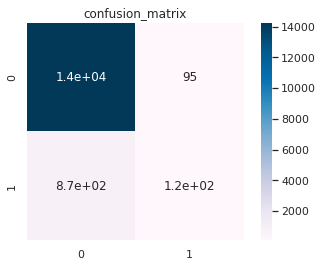

In [85]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='PuBu',square=True,)
plt.title('confusion_matrix')
plt.show()

In [81]:
print('classification_report : \n',classification_report(y_test,y_pred))

classification_report : 
               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     14339
         1.0       0.56      0.12      0.20       995

    accuracy                           0.94     15334
   macro avg       0.75      0.56      0.58     15334
weighted avg       0.92      0.94      0.92     15334

